In [1]:
import warnings
from sklearn.metrics import mean_absolute_error
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
!pip install pymongo dnspython

     |████████████████████████████████| 241 kB 5.1 MB/s 


In [3]:
!pip install dnspython

In [4]:
import pymongo

In [5]:
import dns

In [6]:
user_name = "Thmo89"
psw = "Authentication "
uri2 = "mongodb+srv://{}:{}@cluster1.mknx2.mongodb.net/myFirstDatabase?retryWrites=true&w=majority".format(user_name, psw)

In [7]:
client = pymongo.MongoClient(uri2)
db = client.Tomates_meteo_Centre15
mycl = db["données"]
Dat = pd.DataFrame(list(mycl.find()))
DT = pd.DataFrame(Dat, columns = ['Rafale max  help', 'soleil_durée',
       'Précipitations en mm',  'Température minimale en °C',
       'Température maximale en °C', 'prix moyen au kg',
       'Production quantité tonne(s)', 'Date'])
DT.to_csv('TMN.csv',index = False)
Pop = pd.read_csv("/content/TMN.csv", parse_dates=['Date'], dayfirst= True)
Pop.sort_values(by=['Date'], inplace=True, ascending=True)  #pour mettre les dates dans l'ordre
Pop =  Pop.set_index(['Date'])
Pop

,Rafale max help,soleil_durée,Précipitations en mm,Température minimale en °C,Température maximale en °C,prix moyen au kg,Production quantité tonne(s)
Date,,,,,,,
2012-06-14,31.0,583.0,3.0,8.0,22.6,1.500000,0.060000
2012-06-15,55.8,198.0,9.3,14.4,22.1,1.500000,0.070000
2012-06-16,50.8,156.0,5.0,13.7,18.0,1.433333,0.346667
2012-06-17,35.3,728.0,19.9,8.2,21.9,1.366667,0.623333
2012-06-18,42.6,258.0,0.0,12.7,20.7,1.300000,0.900000
...,...,...,...,...,...,...,...
2021-12-08,39.6,701.0,0.0,14.0,31.2,1.200000,0.100000
2021-12-09,23.0,579.0,0.0,10.5,24.1,1.200000,0.100000
2021-12-10,29.2,351.0,0.0,3.4,16.7,1.200000,0.100000


In [8]:
Production = Pop['Production quantité tonne(s)']
Prix = Pop['prix moyen au kg']
print(Prix.shape)
print(Production.shape)

(3420,)
(3420,)


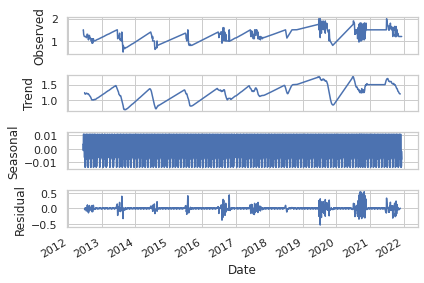

In [9]:
result = seasonal_decompose(Prix, freq=30)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
result.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Prix,autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Nb observations'])
print('Test statistique: %f' % result[0])
print('p-value: %f' % result[1])
print('Valeurs critiques:')
for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

Test statistique: -3.189990
p-value: 0.020571
Valeurs critiques:
1%: -3.432
5%: -2.862
10%: -2.567


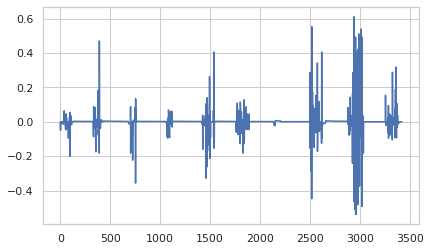

In [11]:
ts_temp_log = np.log(Prix)
ts_temp_log_diff = np.diff(ts_temp_log)
plt.plot(ts_temp_log_diff)

Text(0.5, 0, 'Année')

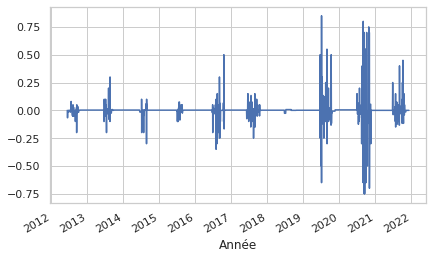

In [12]:
Prix.diff().plot()
plt.xlabel('Année')

In [13]:
result = adfuller(ts_temp_log_diff,autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Nb observations'])
print('Test statistique: %f' % result[0])
print('p-value: %f' % result[1])
print('Valeurs critiques:')
for key, value in result[4].items():
  print('%s: %.3f' % (key, value))

Test statistique: -10.277775
p-value: 0.000000
Valeurs critiques:
1%: -3.432
5%: -2.862
10%: -2.567


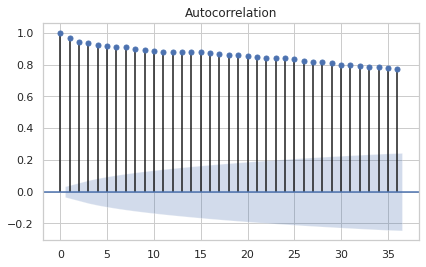

In [14]:
plot_acf(Prix)
plt.show()

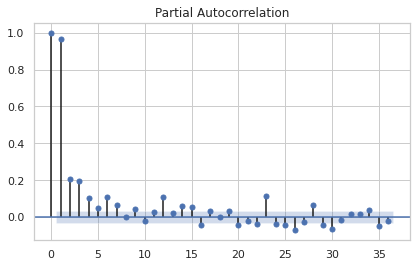

In [15]:
plot_pacf(Prix)
plt.show()

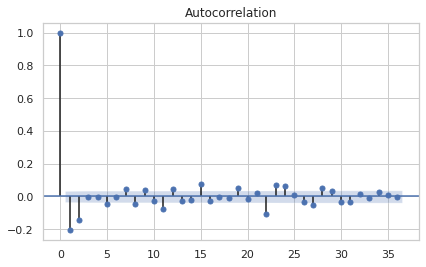

In [16]:
plot_acf(ts_temp_log_diff)
plt.show()

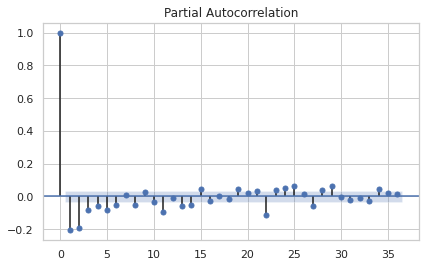

In [17]:
plot_pacf(ts_temp_log_diff)
plt.show()

In [18]:
s= int(len(Prix)* 0.7)

train = Prix.iloc[:s]
test = Prix.iloc[s:]

  
model = ARIMA(train,  order = (1, 0, 3))

result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       prix moyen au kg   No. Observations:                 2394
Model:                     ARMA(1, 3)   Log Likelihood                4894.162
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 15 Dec 2021   AIC                          -9776.325
Time:                        10:21:53   BIC                          -9741.640
Sample:                             0   HQIC                         -9763.705
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.2239      0.076     16.170      0.000       1.076       1.372
ar.L1.prix moyen au kg     0.9929      0.003    386.299      0.000       0.988       0.998
ma.L1.prix moyen au kg     0.0191      0.020      0.933      0.351      -0.021       0.059
ma.L2.prix moyen au kg     0.0044      0.021      0.207      0.836      -0.037       0.046
ma.L3.prix moyen au kg    -0.1481      0.020     -7.443      0.000      -0.187      -0.109
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0072           +0.0000j            1.0072            0.0000
MA.1           -0.9466           -1.6172j            1.8738           -0.3343
MA.2           -0.9466           +1.6172j            1.8738            0.3343
MA.3            1.9229           -0.0000j            1.9229           -0.0000
-----------------------------------------------------------------------------
"""

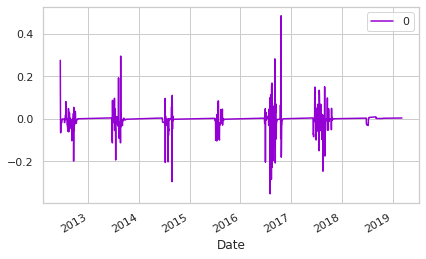

In [19]:
residuals = pd.DataFrame(result.resid)
residuals.plot(color = 'darkviolet')

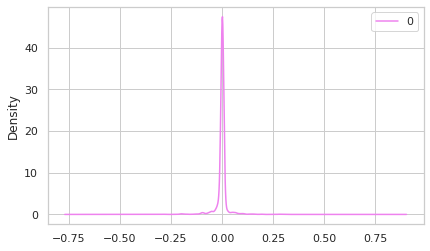

In [20]:
residuals.plot(kind='kde', color = 'violet')

In [21]:
residuals.describe()

,0
count,2394.000000
mean,-0.000136
std,0.031803
min,-0.352086
25%,-0.000243
50%,0.001923
75%,0.003481
max,0.485722


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



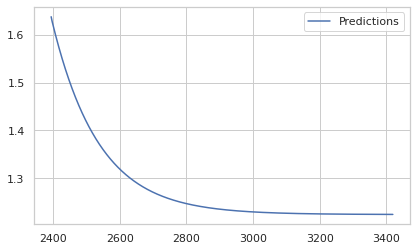

In [22]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end).rename("Predictions")

predictions.plot(legend = True)


In [23]:
rmseP = sqrt(mean_squared_error(test, predictions))
rmseP

0.2936910306125779

In [24]:
mean_absolute_error(test, predictions)

0.25892285016258904

In [25]:
from datetime import date
n=7

forecast,err,ci= result.forecast(steps= n, alpha = 0.05)
df_forecast = pd.DataFrame({'Prix dans 7 jours':forecast},index=pd.date_range(start= date.today(), periods=n, freq='D'))
df_forecast

,Prix dans 7 jours
2021-12-15,1.637864
2021-12-16,1.634271
2021-12-17,1.630682
2021-12-18,1.627793
2021-12-19,1.624924
2021-12-20,1.622075
2021-12-21,1.619246


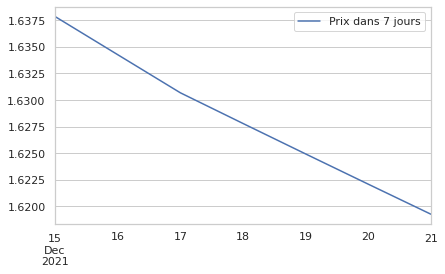

In [26]:
df_forecast.plot()

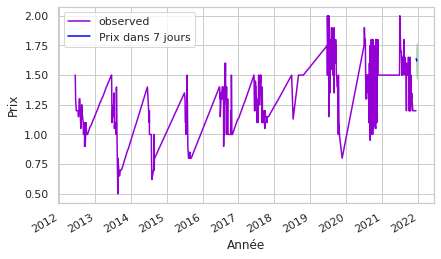

In [27]:
ax = Prix.plot(label='observed', color = 'darkviolet')
df_forecast.plot(ax=ax,label='Forecast',color='blue')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='green', alpha=.25)
ax.set_xlabel('Année')
ax.set_ylabel('Prix')

plt.legend()
plt.show()

**Production**

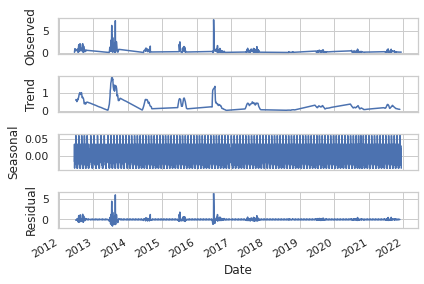

In [28]:
result = seasonal_decompose(Production, freq=30)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
result.plot()
plt.show()

In [29]:
result = adfuller(Production,autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Nb observations'])
print('Test statistique: %f' % result[0])
print('p-value: %f' % result[1])
print('Valeurs critiques:')
for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

Test statistique: -6.032166
p-value: 0.000000
Valeurs critiques:
1%: -3.432
5%: -2.862
10%: -2.567


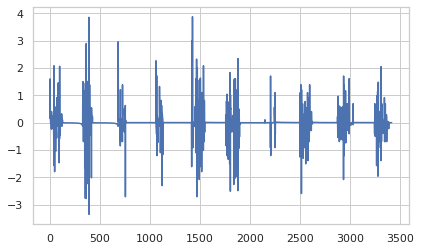

In [30]:
ts_temp_log2 = np.log(Production)
ts_temp_log_diff2 = np.diff(ts_temp_log2)
plt.plot(ts_temp_log_diff2)

Text(0.5, 0, 'Année')

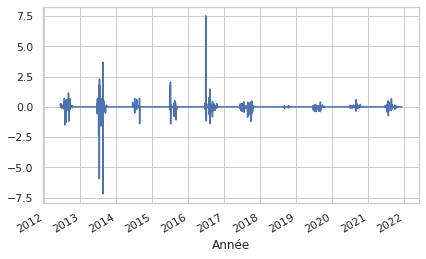

In [36]:
Production.diff().plot()
plt.xlabel('Année')

In [31]:
result = adfuller(ts_temp_log_diff2,autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Nb observations'])
print('Test statistique: %f' % result[0])
print('p-value: %f' % result[1])
print('Valeurs critiques:')
for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

Test statistique: -15.131645
p-value: 0.000000
Valeurs critiques:
1%: -3.432
5%: -2.862
10%: -2.567


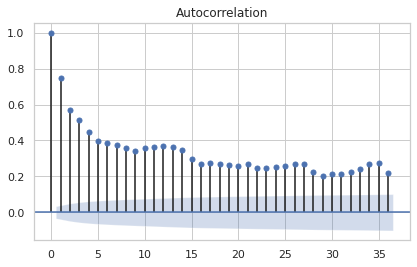

In [32]:
plot_acf(Production)
plt.show()

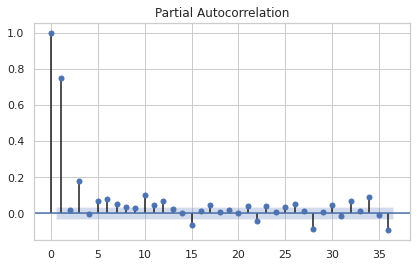

In [33]:
plot_pacf(Production)
plt.show()

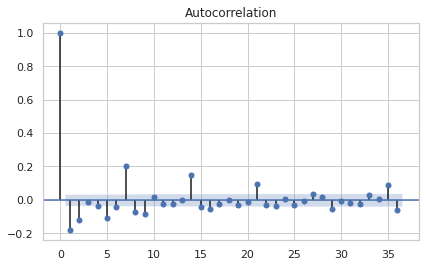

In [34]:
plot_acf(ts_temp_log_diff2)
plt.show()

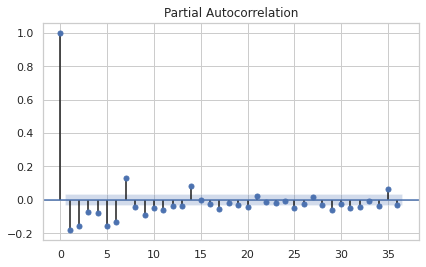

In [35]:
plot_pacf(ts_temp_log_diff2)
plt.show()

In [37]:
s1= int(len(Production)* 0.7)

train2 = Production.iloc[:s1]
test2 = Production.iloc[s1:]

  
model2 = ARIMA(train2,  order = (1, 0, 3))

result2 = model2.fit()
result2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Production quantité tonne(s)   No. Observations:                 2394
Model:                               ARMA(1, 3)   Log Likelihood                -584.500
Method:                                 css-mle   S.D. of innovations              0.309
Date:                          Wed, 15 Dec 2021   AIC                           1181.001
Time:                                  10:25:58   BIC                           1215.685
Sample:                                       0   HQIC                          1193.620
                                                                                        
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3029      0.045      6.707      0.000       0.214       0.391
ar.L1.Production quantité tonne(s)     0.9468      0.014     67.397      0.000       0.919       0.974
ma.L1.Production quantité tonne(s)    -0.2310      0.026     -8.825      0.000      -0.282      -0.180
ma.L2.Production quantité tonne(s)    -0.3328      0.028    -11.974      0.000      -0.387      -0.278
ma.L3.Production quantité tonne(s)    -0.0533      0.024     -2.238      0.025      -0.100      -0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0562           +0.0000j            1.0562            0.0000
MA.1            1.3147           +0.0000j            1.3147            0.0000
MA.2           -3.6510           +0.0000j            3.6510            0.5000
MA.3           -3.9103           +0.0000j            3.9103            0.5000
-----------------------------------------------------------------------------
"""

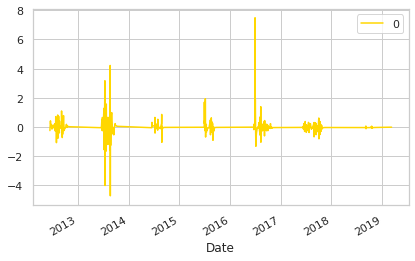

In [38]:
residuals2 = pd.DataFrame(result2.resid)
residuals2.plot(color = 'gold')

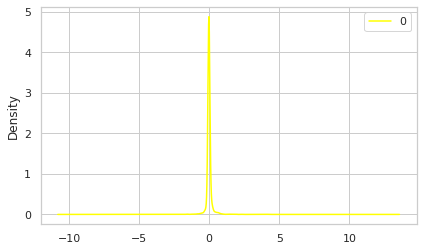

In [39]:
residuals2.plot(kind='kde', color = 'yellow')

In [40]:
residuals2.describe()

,0
count,2394.000000
mean,-0.000034
std,0.308911
min,-4.708639
25%,-0.033803
50%,-0.020763
75%,-0.007107
max,7.483618


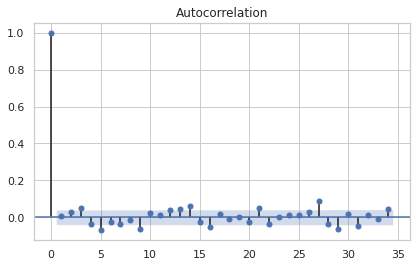

In [41]:
plot_acf(residuals2)
plt.show()

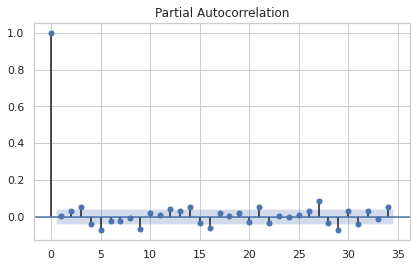

In [42]:
plot_pacf(residuals2)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



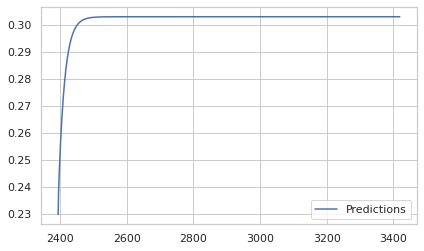

In [43]:
start = len(train2)
end = len(train2) + len(test2) - 1

predictions2 = result2.predict(start, end).rename("Predictions")

predictions2.plot(legend = True)


In [44]:
sqrt(mean_squared_error(test2, predictions2))

0.1418926033905501

In [45]:
mean_absolute_error(test2, predictions2)

0.118447015858993

In [46]:
n=7
forecast,err,ci = result2.forecast(steps= n, alpha = 0.05)
df_forecast2 = pd.DataFrame({'Production dans 7 jours':forecast},index=pd.date_range(start= date.today(), periods=n, freq='D'))
df_forecast2

,Production dans 7 jours
2021-12-15,0.229720
2021-12-16,0.237092
2021-12-17,0.241070
2021-12-18,0.244358
2021-12-19,0.247471
2021-12-20,0.250418
2021-12-21,0.253209


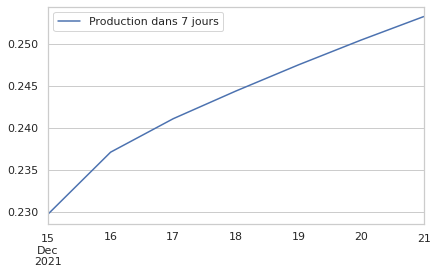

In [47]:
df_forecast2.plot()

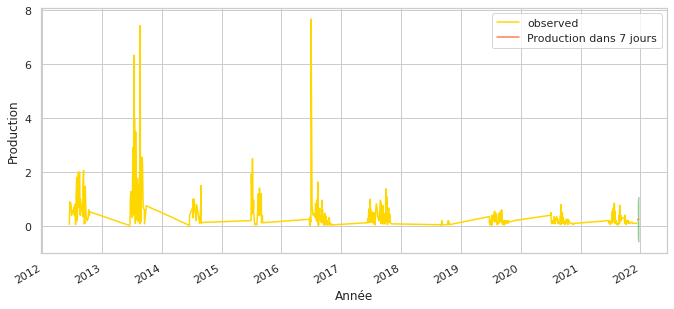

In [48]:
ax = Production.plot(label='observed', figsize=(10,5), color = 'gold')
df_forecast2.plot(ax=ax,label='Forecast',color='coral')
ax.fill_between(df_forecast2.index,
                ci[:,0],
                ci[:,1], color='green', alpha=.25)
ax.set_xlabel('Année')
ax.set_ylabel('Production')

plt.legend()
plt.show()

**Enregistrement du modèle**

In [49]:
import pickle
filename = 'modèle_ARIMA_Prix5.pkl'
pickle.dump(result, open(filename, 'wb'))

In [50]:
modèle1 = pickle.load(open(filename, 'rb'))
modèle1

(-15.131645075404391,
 7.217557739912018e-28,
 30,
 3388,
 {'1%': -3.4322816001964527,
  '10%': -2.5672243179169763,
  '5%': -2.8623934690652564},
 2196.8252880872296)

In [51]:
filename2 = 'modèle_ARIMA_Production5.pkl'
pickle.dump(result2, open(filename2, 'wb'))

**Gridsearch**

In [52]:
p =[0, 1, 2, 3, 4, 5, 6]
d = range(0, 10)
q = [0, 1, 2, 3, 4, 5, 6]

In [53]:
def p_prix(train, p, d, q):
  data = pd.DataFrame()
  for i in p:
    for j in d:
      for k in q:
        order = (i,j,k)
      try:
        mod = ARIMA(train,order)
        results = mod.fit()
        # print(results.summary())
        start = len(train)
        end = len(train) + len(test) - 1
        predictions = results.predict(start, end).rename("Predictions")
        RMSEP = sqrt(mean_squared_error(test, predictions))
        print(RMSEP)
        MaeP = mean_absolute_error(test, predictions)
        print(MaeP)
        data = data.append({"p":i, "d":j,"q":k,"RMSE":RMSEP , "MAE":MaeP}, ignore_index=True)
      
      except:
        pass
  data = data.sort_values(by='RMSE')
  return data

In [54]:
p_prix(train, p, d, q)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.36202073279237734
0.3209985579166314


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



1.466149977825034
1.4437997944679382


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.29458447969187135
0.25981990286886775


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



1.4661389022541755
1.4437883393616135


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



1.4662159252678828
1.4438668193734843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.287218306473222
0.252120337474303


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



1.4662159264652588
1.4438668212004018


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

1.4662152013920349
1.4438661031772049


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,MAE,RMSE,d,p,q
5,0.252120,0.287218,0.0,2.0,6.0
2,0.259820,0.294584,0.0,1.0,6.0
0,0.320999,0.362021,0.0,0.0,6.0
3,1.443788,1.466139,1.0,1.0,6.0
1,1.443800,1.466150,1.0,0.0,6.0
7,1.443866,1.466215,2.0,6.0,6.0
4,1.443867,1.466216,2.0,1.0,6.0
6,1.443867,1.466216,2.0,2.0,6.0


In [55]:
def p_pro(train2, p, d, q):
  data = pd.DataFrame()
  for i in p:
    for j in d:
      for k in q:
        order = (i,j,k)
      try:
        mod2 = ARIMA(train2,order)
        results2 = mod2.fit()
        # print(results.summary())
        start = len(train2)
        end = len(train2) + len(test2) - 1
        predictions2 = results2.predict(start, end).rename("Predictions")
        RMSEPo = sqrt(mean_squared_error(test2, predictions2))
        print(RMSEPo)
        MaePo = mean_absolute_error(test2, predictions2)
        print(MaePo)
        data = data.append({"p":i, "d":j,"q":k,"RMSE":RMSEPo , "MAE":MaePo}, ignore_index=True)
       
        
      except:
        pass
  data = data.sort_values(by='RMSE')
  return data

In [56]:
p_pro(train2, p, d, q)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

0.14275643897864554
0.1187171037103907


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.24579366257865387
0.21785156859257515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.1427120529603158
0.11866113967747295


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.24579281903896377
0.21785176725072944


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.14288568104515145
0.11893499165410847


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



0.2457902135470416
0.21784769345459892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no 

0.24561483395694497
0.21767201817195198


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index 

0.24560796313482763
0.2176643793839958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index 

0.24561413814143548
0.21767128924620263


,MAE,RMSE,d,p,q
2,0.118661,0.142712,0.0,2.0,6.0
0,0.118717,0.142756,0.0,1.0,6.0
4,0.118935,0.142886,0.0,3.0,6.0
7,0.217664,0.245608,1.0,5.0,6.0
8,0.217671,0.245614,1.0,6.0,6.0
6,0.217672,0.245615,1.0,4.0,6.0
5,0.217848,0.245790,1.0,3.0,6.0
3,0.217852,0.245793,1.0,2.0,6.0
1,0.217852,0.245794,1.0,1.0,6.0
